The following implementation is for Harris Corner Detection as we showed in class.

**Task 1**: Try different parameters on "windows_size" and "threshold" for multiple image inputs [at least 2]

**Task 2**: In Step 5 below, we have one way to calculate the response matrix. Please try different methods to calculate the response matrix [See Page 50 at https://github.com/allan-tulane/CMPS3660-6660/blob/main/slides/W3_2_corners_slides.pdf

Specifically, R = min(lambda_1, lambda_2) or R = det(M)/(trace(M)+epsilon), where 'epsilon' is small value. 

**Task 3**: Line Detection via Harris Method

Harris method is a general method for both corner detection and edge detection. Please implement based on the harris corner code below. 
After that, please compare with the learned edge detection filter methods. That is, please their results given the same input.

In [1]:
import cv2
import numpy as np; np.random.seed(0)
from matplotlib import pyplot as plt
from skimage import io
import seaborn as sns; sns.set_theme()


Finding Corners...


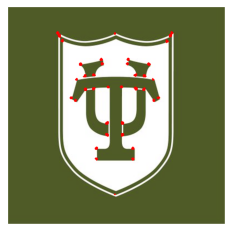

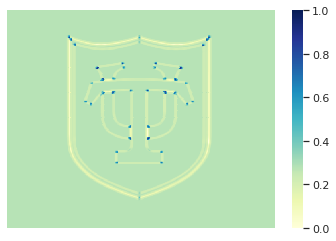

In [2]:

def Harris_Corner(img, window_size, threshold):
    ## img is the input color image -> 3 Channels
    ## window_size means how many surrounding pixels are used


    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
    height = img.shape[0]   #.shape[0] outputs height 
    width = img.shape[1]    #.shape[1] outputs width .shape[2] outputs color channels of image
    matrix_R = np.zeros((height,width))
    
    #   Step 1 - Calculate the x e y image derivatives (dx e dy)
    dx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    #   Step 2 - Calculate product and second derivatives (dx2, dy2 e dxy)
    dx2=np.square(dx)
    dy2=np.square(dy)
    dxy=dx*dy

    offset = int( window_size / 2 )
    #   Step 3 - Calcular a soma dos produtos das derivadas para cada pixel (Sx2, Sy2 e Sxy)
    print ("Finding Corners...")
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            Sx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])

            #   Step 4 - Define the matrix H(x,y)=[[Sx2,Sxy],[Sxy,Sy2]]
            H = np.array([[Sx2,Sxy],[Sxy,Sy2]])

            #   Step 5 - Calculate the response function ( R=det(H)-k(Trace(H))^2 )
            k = 0.04
            det=np.linalg.det(H)
            tr=np.matrix.trace(H)
            R=det-k*(tr**2)
            matrix_R[y-offset, x-offset]=R
    
    #   Step 6 - Apply a threshold
    cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            value=matrix_R[y, x]
            if value>threshold:
                # draw circle on the pixel with value larger than threshold
                cv2.circle(img,(x,y),1,(0,0,255))
                

    plt.figure("Manually implemented Harris detector")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.show()
    ## return response matrix with each element as the cornerness for this pixel
    return matrix_R



In [2]:
url = 'https://www.cs.tulane.edu/~zding1/tulane.jpg'
image = io.imread(url) 


In [ ]:
matrix_R = Harris_Corner(image, 5, 0.4) # Change this path to one that will lead to your image

ax = sns.heatmap(matrix_R, cmap="YlGnBu", xticklabels=False, yticklabels=False)

### 1. Window size and Threshold values

In [2]:
window_size = [5,10]
threshold_values = [0.4,0.8]

url1 = 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.R8_G_CG8dhuTqcoxKKkscwHaFP%26pid%3DApi&f=1&ipt=63a428fa99160d3c6f7a42ce2fdd019a8ee62c48e7d1a38c2f6f2e9a02bdcafd&ipo=images'
image1 = io.imread(url1) 

url2 = "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.RqtX07ZcCGtj0--aw74SCwHaLj%26pid%3DApi&f=1&ipt=7decf3fc1dc89d2368388648fbc379230a1a8c9c7d83b11af1059471ef9a09bf&ipo=images"
image2 = io.imread(url2)



5 0.4
Finding Corners...


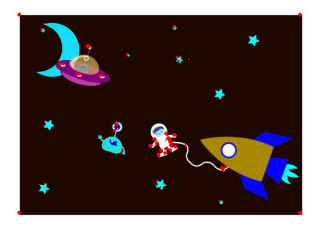

5 0.8
Finding Corners...


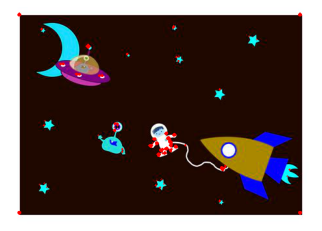

10 0.4
Finding Corners...


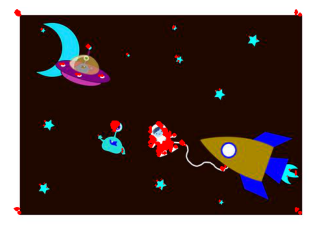

10 0.8
Finding Corners...


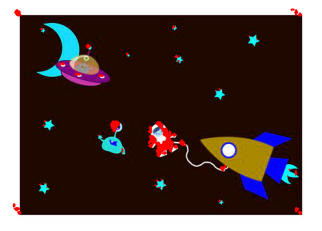

In [3]:
for window in window_size:
  for threshold in threshold_values:
    print(window, threshold)
    Harris_Corner(image1, window, threshold)


5 0.4
Finding Corners...


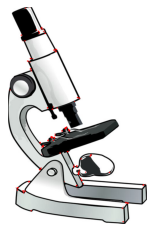

5 0.8
Finding Corners...


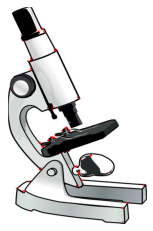

10 0.4
Finding Corners...


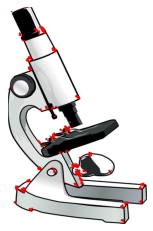

10 0.8
Finding Corners...


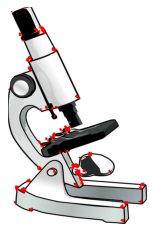

In [4]:
for window in window_size:
  for threshold in threshold_values:
    print(window, threshold)
    Harris_Corner(image2, window, threshold)

### Task 2: 

R = min(lambda_1, lambda_2) or R = det(M)/(trace(M)+epsilon)

Finding Corners...


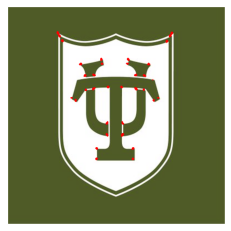

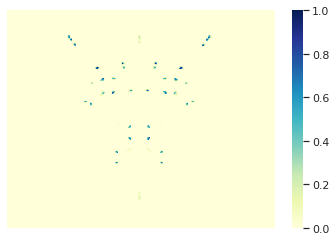

In [3]:
def Harris_Corner(img, window_size, threshold, response= 'Harris'):
    ## img is the input color image -> 3 Channels
    ## window_size means how many surrounding pixels are used

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        
    height = img.shape[0]   #.shape[0] outputs height 
    width = img.shape[1]    #.shape[1] outputs width .shape[2] outputs color channels of image
    matrix_R = np.zeros((height,width))
    
    #   Step 1 - Calculate the x e y image derivatives (dx e dy)
    dx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    #   Step 2 - Calculate product and second derivatives (dx2, dy2 e dxy)
    dx2=np.square(dx)
    dy2=np.square(dy)
    dxy=dx*dy

    offset = int( window_size / 2 )
    #   Step 3 - Calcular a soma dos produtos das derivadas para cada pixel (Sx2, Sy2 e Sxy)
    print ("Finding Corners...")
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            Sx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])

            #   Step 4 - Define the matrix H(x,y)=[[Sx2,Sxy],[Sxy,Sy2]]
            H = np.array([[Sx2,Sxy],[Sxy,Sy2]])

            #   Step 5 - Calculate the response function 
            #   R = det(M)/(trace(M)+epsilon)
            
              # R = min(lambda_1, lambda_2)
            def response_choice(response):
              R = 0
              if response == 'Harris':
                # R=det(H)-k(Trace(H))^2 
                k = 0.04
                det=np.linalg.det(H)
                tr=np.matrix.trace(H)
                R=det-k*(tr**2)
              elif response == 'Kanade':
                eig_value, eig_vect = np.linalg.eig(H)
                R = min(eig_value[0], eig_value[1])
              
              elif response == 'Nobel': 
              #R = det()/(trace(M)+epsilon)
                det = np.linalg.det(H)
                tr = np.matrix.trace(H)
                R = det / tr
              return R

            matrix_R[y-offset, x-offset] = response_choice(response)
            
    #   Step 6 - Apply a threshold
    cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            value=matrix_R[y, x]
            if value>threshold:
                # draw circle on the pixel with value larger than threshold
                cv2.circle(img,(x,y),1,(0,0,255))
                

    plt.figure("Manually implemented Harris detector")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.show()
    ## return response matrix with each element as the cornerness for this pixel
    return matrix_R

## entrance of the code

url = 'https://www.cs.tulane.edu/~zding1/tulane.jpg'
image = io.imread(url) 

matrix_R = Harris_Corner(image, 5, 0.4, response= 'Kanade') # Change this path to one that will lead to your image

ax = sns.heatmap(matrix_R, cmap="YlGnBu", xticklabels=False, yticklabels=False)

### Task 3: Hough Lines

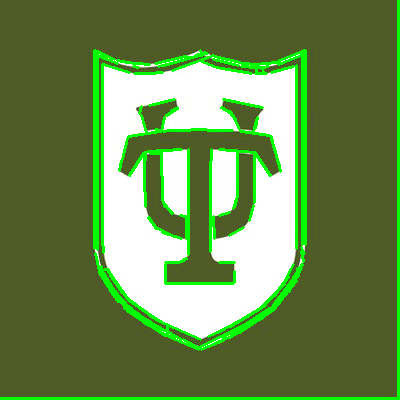

In [3]:
from google.colab.patches import cv2_imshow
edge = cv2.Canny(image, 50, 150)

lines = cv2.HoughLinesP(edge, 1, np.pi/180, threshold= 10, minLineLength= 5, maxLineGap= 5)

def generate_lines(lines):
  for points in lines:
      x1, y1, x2, y2 = points[0]
      cv2.line(image,(x1, y1),(x2, y2), (0, 255, 0), 2)

generate_lines(lines)

cv2_imshow(image)